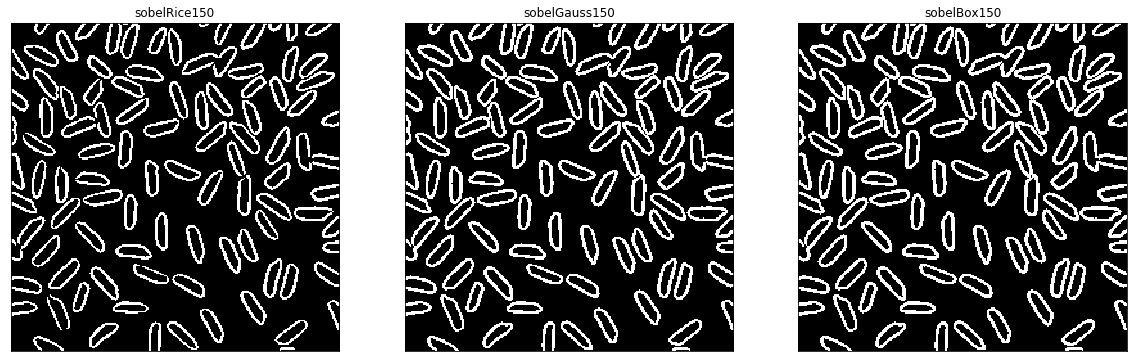

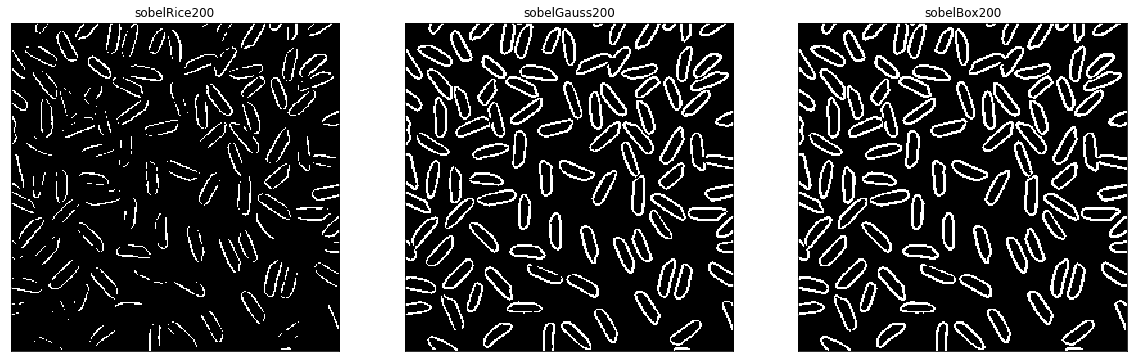

clearly sharpeneing increased edges found


In [72]:
##############################
# ASSIGNMENT 1: Question 2.1 #
##############################

#2.1 part 1 effect of sharpening on edge detection
import numpy as np
import cv2
import matplotlib.pyplot as plt

#image to be processed
rice = cv2.imread("./rice.png", cv2.IMREAD_GRAYSCALE)

#5*5 box filtered image
boxBlur = cv2.blur(rice, (5,5))

#5*5 gaussian filterd image
gaussBlur = cv2.GaussianBlur(rice, (5,5), np.sqrt(2))

#sharpening equation for box
boxSharpened = rice + rice - boxBlur

#sharpening equation for gaussian
gaussSharpened = rice + rice - gaussBlur

#method to find sobel edges
def sobelDetect(img, thr):
    #horizental edges
    I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    #vertical edges
    I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    #compute the magnitued of both directions
    im = cv2.magnitude(I_x, I_y)
    #apply threshold
    ret, thres = cv2.threshold(im,thr,255,cv2.THRESH_BINARY)
    
    return thres
    
#call the function on the different images with different thresholds
sobelRice150 = sobelDetect(rice, 150)
sobelGauss150 = sobelDetect(gaussSharpened, 150)
sobelBox150 = sobelDetect(boxSharpened, 150)

sobelRice200 = sobelDetect(rice, 200)
sobelGauss200 = sobelDetect(gaussSharpened, 200)
sobelBox200 = sobelDetect(boxSharpened, 200)



#plot
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(sobelRice150, cmap="gray") 
plt.title("sobelRice150"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(sobelGauss150, cmap="gray")
plt.title("sobelGauss150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(sobelBox150, cmap="gray")
plt.title("sobelBox150"), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(sobelRice200, cmap="gray") 
plt.title("sobelRice200"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(sobelGauss200, cmap="gray")
plt.title("sobelGauss200"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(sobelBox200, cmap="gray")
plt.title("sobelBox200"), plt.xticks([]), plt.yticks([])
plt.show()

print("clearly sharpeneing increased edges found")

As explained in 1.1, sharpening magnifies the "changes" in intensity at the edges which means that edge detectors will have higher chances of finding those edges (as there's large changes in intensity). The results above confirms the previous statement as with the 200 threshold, the sharpened images founder clearer edges.

max filter response 795.0308170127747
max filter response 795.0308170127747


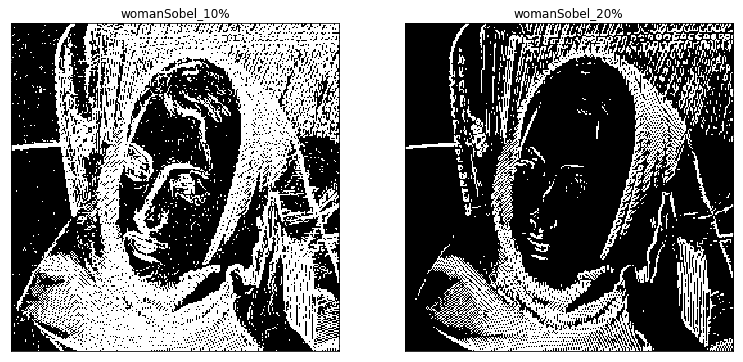

In [73]:
# part 2 effect of denoising on edge detection

woman = cv2.imread("./woman.png", cv2.IMREAD_GRAYSCALE)

#sobel detector with thresholds as persentages
def sobelDetectPer(img, thr):
    #horizontal edges
    I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    #vertical edges
    I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    #find magnitude of both directions
    im = cv2.magnitude(I_x, I_y)
    #print for calrification
    print("max filter response", im.max())
    #apply threshold as a percentage of the max filter response
    ret, thres = cv2.threshold(im,thr * im.max(),255,cv2.THRESH_BINARY)
    return thres

#call function on the image with different thresholds
womanSobel_10 = sobelDetectPer(woman, 0.1)
womanSobel_20 = sobelDetectPer(woman, 0.2)

#plot 
plt.figure(figsize=(20, 20)) 
plt.subplot(131), plt.imshow(womanSobel_10, cmap="gray") 
plt.title("womanSobel_10%"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(womanSobel_20, cmap="gray") 
plt.title("womanSobel_20%"), plt.xticks([]), plt.yticks([])
plt.show()

max filter response 323.8302024209601
max filter response 323.8302024209601


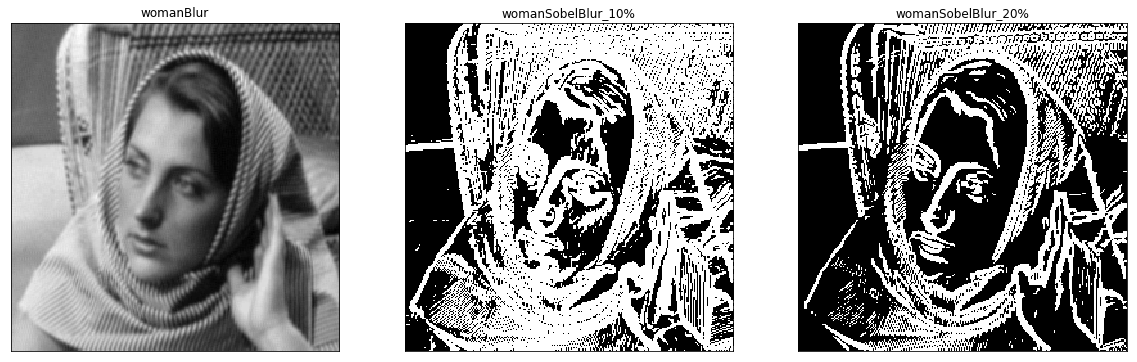

In [74]:
#Blur image before detecting

#blurred image
womanBlur = cv2.blur(woman, (3,3))

#call function on the blurred image with different thresholds
womanSobelBlur_10 = sobelDetectPer(womanBlur, 0.1)
womanSobelBlur_20 = sobelDetectPer(womanBlur, 0.2)

#plot 
plt.figure(figsize=(20, 20)) 
plt.subplot(131), plt.imshow(womanBlur, cmap="gray") 
plt.title("womanBlur"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(womanSobelBlur_10, cmap="gray") 
plt.title("womanSobelBlur_10%"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(womanSobelBlur_20, cmap="gray") 
plt.title("womanSobelBlur_20%"), plt.xticks([]), plt.yticks([])
plt.show()

Theoretically, we should see less "white lines" or edges after blurring the images because blurring gets rid of noise which might be mistaken for an edge. However, in this question we use precentage threshold, which means that the threshold for the blurred and non-blurred images are different. For instacen, the max filter response of the non blurred image is 795 while the max of the blurred image is 323, which means that the threshold of the first image is 79.5 and 32.3 for the second one. This explains why we see more white lines in the blurred images when in fact we should see less white lines. (as a sanity check, I tried running a fixed threshold on the blurred and non blurred images, and the result was that there's less noisy edges in the blurred image as expected)